# General Subplots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Lets create a dataset
x_axis=np.arange(1,6)
y_axis=np.arange(1,6)
y_axis2=y_axis**2

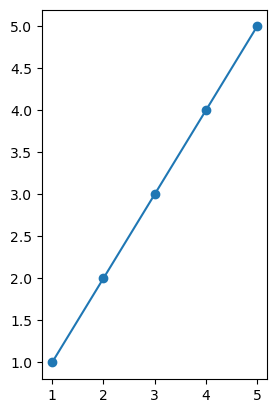

In [3]:
#Lets just work with one subplot of the grid
plt.figure()

#Command below creates subplot with 1 row and 2 columns
plt.subplot(1,2,1)

#Addressing the 1 grid created in the subplot
plt.plot(x_axis,y_axis,'-o')

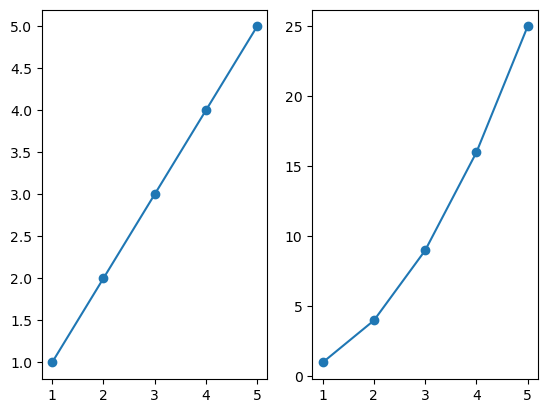

In [4]:
#Lets work with both the subplots of the grid
plt.figure()

plt.subplot(1,2,1)
#Plot for grid 1
plt.plot(x_axis,y_axis,'-o')
#Plot for grid 2
plt.subplot(1,2,2)
plt.plot(x_axis,y_axis2,'-o')

# Subplots after balancing the x and y 

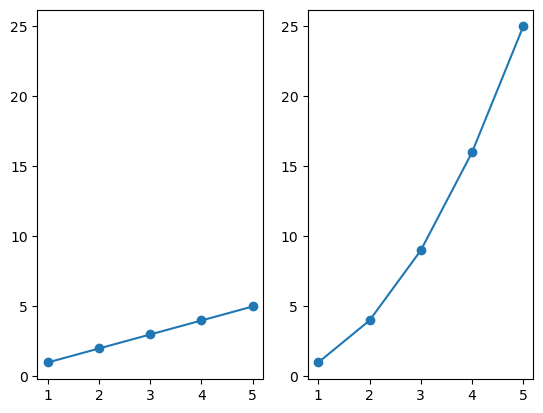

In [5]:
#Lets work with both the subplots of the grid
plt.figure()

ax1=plt.subplot(1,2,1)
#Plot for grid 1
plt.plot(x_axis,y_axis,'-o')
#Plot for grid 2
ax2=plt.subplot(1,2,2,sharey=ax1)
#Note the variable declaration here that was not neccessaryb before
plt.plot(x_axis,y_axis2,'-o')

# Multirow Multicolumn Subplots
There are two techniques to do this. We will see both of them

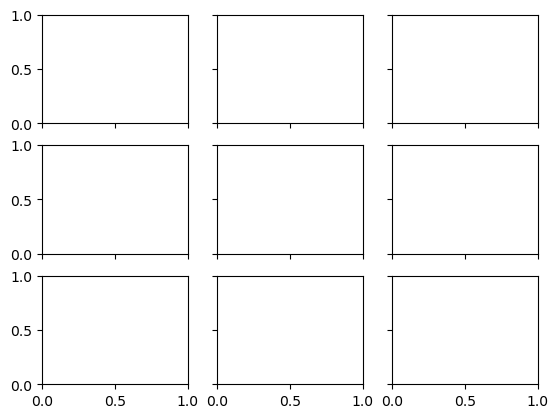

In [6]:
#Technique 1: Create a subplot in one go and store the reference to its different grid in one command. Let see how to do it
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,a8,ax9))=plt.subplots(3,3,sharex=True,sharey=True)

In [7]:
#Lets reference grids one by one using the variable we assigned to them
ax5.plot(x_axis,y_axis,'-o')
ax9.plot(x_axis,y_axis2,'-o')

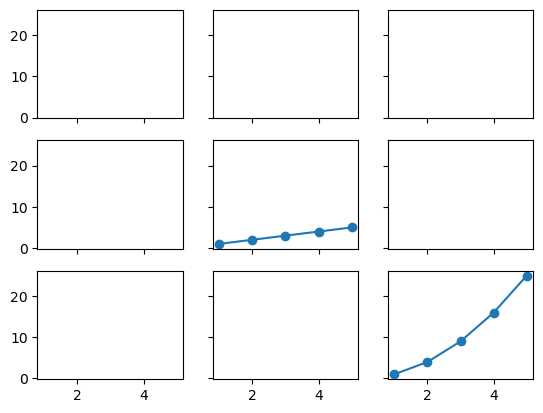

In [8]:
fig #Hope you understood all the varibles we used at the time declaration of the subplots. fig acts as reference to the whole
#fucking subplots where ax1,ax2 and so on refer to single grids here

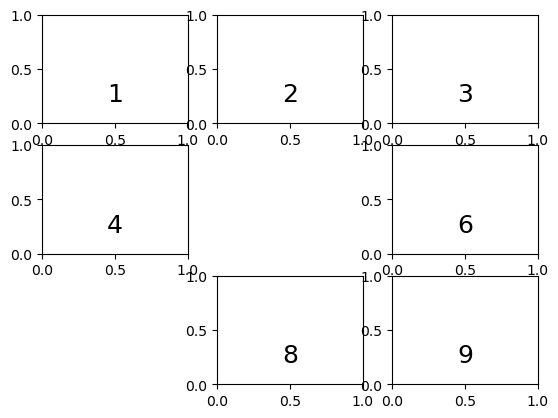

In [9]:
#Another technique is to simply iterate over them
fig=plt.figure()
for i in range(1,10,1):#Indexing of grid starts from 1 unlike 0 in general cases
    if (i!=5 and i!=7):
        ax = fig.add_subplot(3, 3, i)
        ax.text(0.5, 0.2, str((i)),fontsize=18, ha='center')
plt.show()

# Cluster Plots

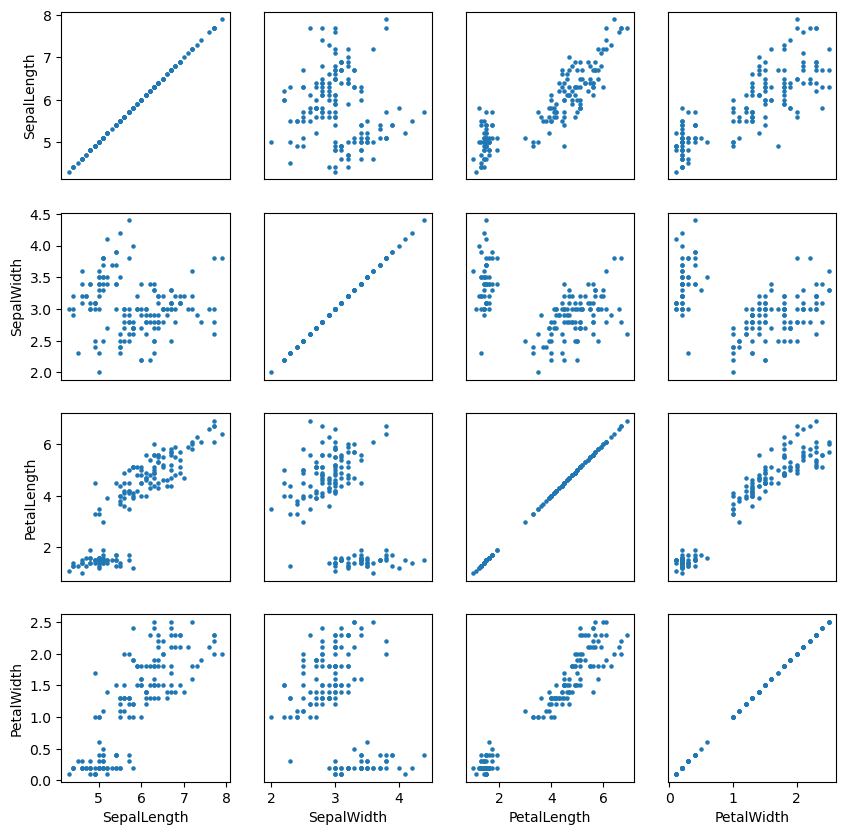

In [10]:
# Let's first capture a list of the variables we are interested in
import pandas as pd
df=pd.read_csv("assets/iris.csv")
cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

# Now we need to create a grid of subplots of size width and height equal to the number of different variables
# we want to explore, in this case that's a 4x4 grid
fig, axs = plt.subplots(len(cols), len(cols), figsize=(10,10))

# Now we want to iterate across each column in our dataframe and compare it to each other column in our
# DataFrame. We'll do this with a couple of nested for loops
for i in range(len(cols)):
    for j in range(len(cols)):
        # Now we just want to plot a scatter plot comparing the columns i and j. Sometimes this will be the
        # same column, so we would expect to see a diagnol line trend. I'm going to set the marker size to 5
        # just to make things a bit more clear
        axs[i,j].scatter(df[cols[j]], df[cols[i]], s=5)

        # Also, we've seen that when we plot multiple Axes things get cluttered with Axis tickmarks and
        # labels, so let's turn those off
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)

        # Then we'll turn them back on only if we are the last row...
        if i == len(cols) - 1:
            axs[i,j].get_xaxis().set_visible(True)
            axs[i,j].set_xlabel(cols[j])
            
        # ...and similarly, only show the y-axis labels for the first column.
        if j == 0:
            axs[i,j].get_yaxis().set_visible(True)
            axs[i,j].set_ylabel(cols[i])

# Now let's take a look at our data!